Import libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")


Pandas: 2.2.3
NumPy: 2.1.1
Seaborn: 0.13.2
Scikit-learn: 1.6.1
Matplotlib: 3.9.2


In [48]:
dataset = pd.read_csv('taipei_diabetes.csv')

In [49]:
# Preview data
dataset.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0        NaN          NaN            NaN                     NaN   
1  1354778.0          0.0          171.0                    80.0   
2        NaN          NaN            NaN                     NaN   
3  1147438.0          8.0           92.0                    93.0   
4        NaN          NaN            NaN                     NaN   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree   Age  Diabetic  
0               NaN           NaN        NaN               NaN   NaN       NaN  
1              34.0          23.0  43.509726          1.213191  21.0       0.0  
2               NaN           NaN        NaN               NaN   NaN       NaN  
3              47.0          36.0  21.240576          0.158365  23.0       0.0  
4               NaN           NaN        NaN               NaN   NaN       NaN

In [33]:
dataset.shape

(30000, 10)

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  float64
 1   Pregnancies             15000 non-null  float64
 2   PlasmaGlucose           15000 non-null  float64
 3   DiastolicBloodPressure  15000 non-null  float64
 4   TricepsThickness        15000 non-null  float64
 5   SerumInsulin            15000 non-null  float64
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  float64
 9   Diabetic                15000 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


In [35]:
dataset.describe().T

count          mean            std           min  \
PatientID               15000.0  1.502922e+06  289253.443471  1.000038e+06   
Pregnancies             15000.0  3.224533e+00       3.391020  0.000000e+00   
PlasmaGlucose           15000.0  1.078569e+02      31.981975  4.400000e+01   
DiastolicBloodPressure  15000.0  7.122067e+01      16.758716  2.400000e+01   
TricepsThickness        15000.0  2.881400e+01      14.555716  7.000000e+00   
SerumInsulin            15000.0  1.378521e+02     133.068252  1.400000e+01   
BMI                     15000.0  3.150965e+01       9.759000  1.820051e+01   
DiabetesPedigree        15000.0  3.989677e-01       0.377944  7.804379e-02   
Age                     15000.0  3.013773e+01      12.089703  2.100000e+01   
Diabetic                15000.0  3.333333e-01       0.471420  0.000000e+00   

                                 25%           50%           75%           max  
PatientID               1.252866e+06  1.505508e+06  1.755205e+06  1.999997e+06  
Pregnancies             0.000000e+00  2.000000e+00  6.000000e+00  1.400000e+01  
PlasmaGlucose           8.400000e+01  1.040000e+02  1.290000e+02  1.920000e+02  
DiastolicBloodPressure  5.800000e+01  7.200000e+01  8.500000e+01  1.170000e+02  
TricepsThickness        1.500000e+01  3.100000e+01  4.100000e+01  9.300000e+01  
SerumInsulin            3.900000e+01  8.300000e+01  1.950000e+02  7.990000e+02  
BMI                     2.125989e+01  3.176794e+01  3.925969e+01  5.603463e+01  
DiabetesPedigree        1.377433e-01  2.002971e-01  6.162851e-01  2.301594e+00  
Age                     2.200000e+01  2.400000e+01  3.500000e+01  7.700000e+01  
Diabetic                0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00

In [36]:
dataset.isnull().sum()

PatientID                 15000
Pregnancies               15000
PlasmaGlucose             15000
DiastolicBloodPressure    15000
TricepsThickness          15000
SerumInsulin              15000
BMI                       15000
DiabetesPedigree          15000
Age                       15000
Diabetic                  15000
dtype: int64

<Axes: xlabel='Diabetic', ylabel='count'>

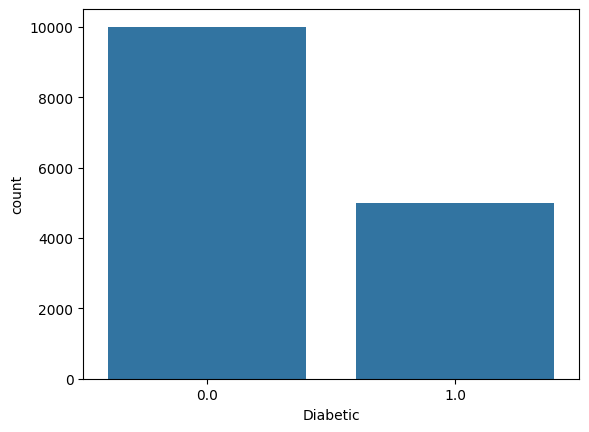

In [37]:
sns.countplot(x = 'Diabetic',data = dataset)

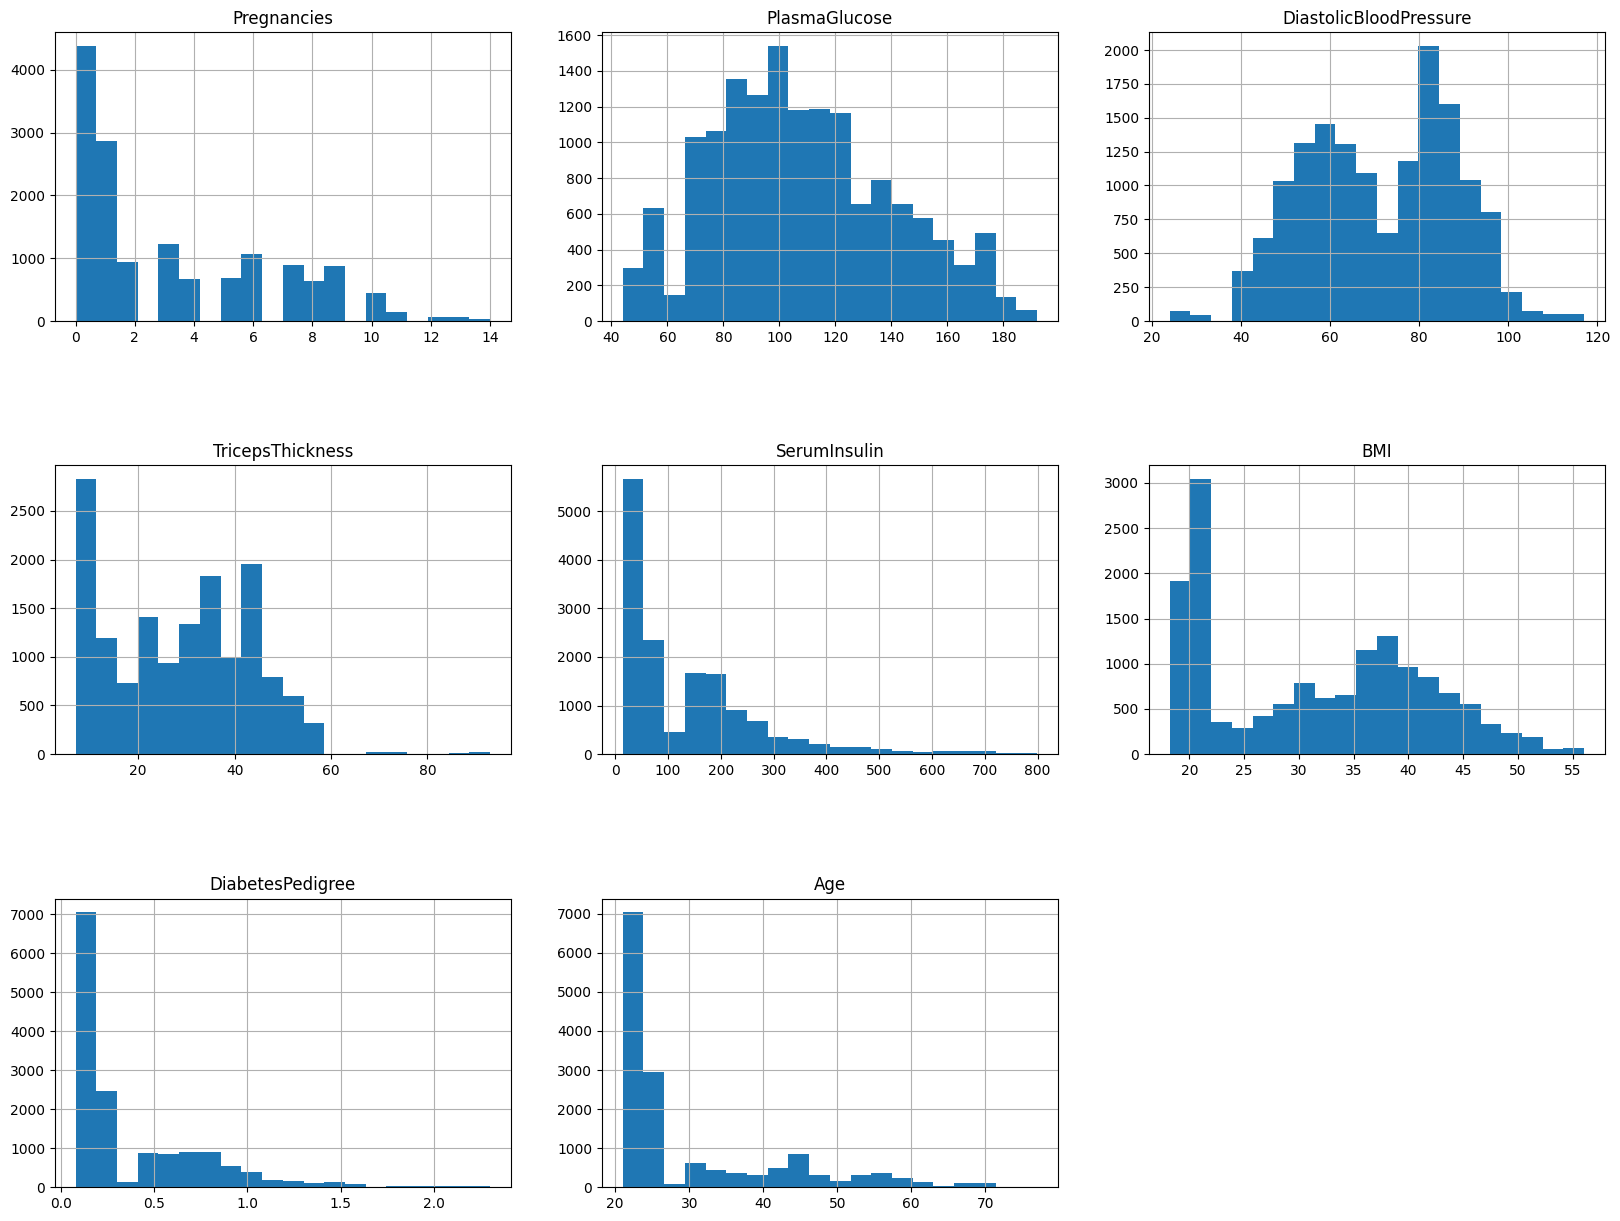

In [76]:
import itertools
import math
import matplotlib.pyplot as plt

col = dataset.columns[1:9]
plt.figure(figsize=(20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(math.ceil(length / 3), 3, j + 1)  # Ensure rows are integers
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    dataset[i].hist(bins=20)
    plt.title(i)

plt.show()


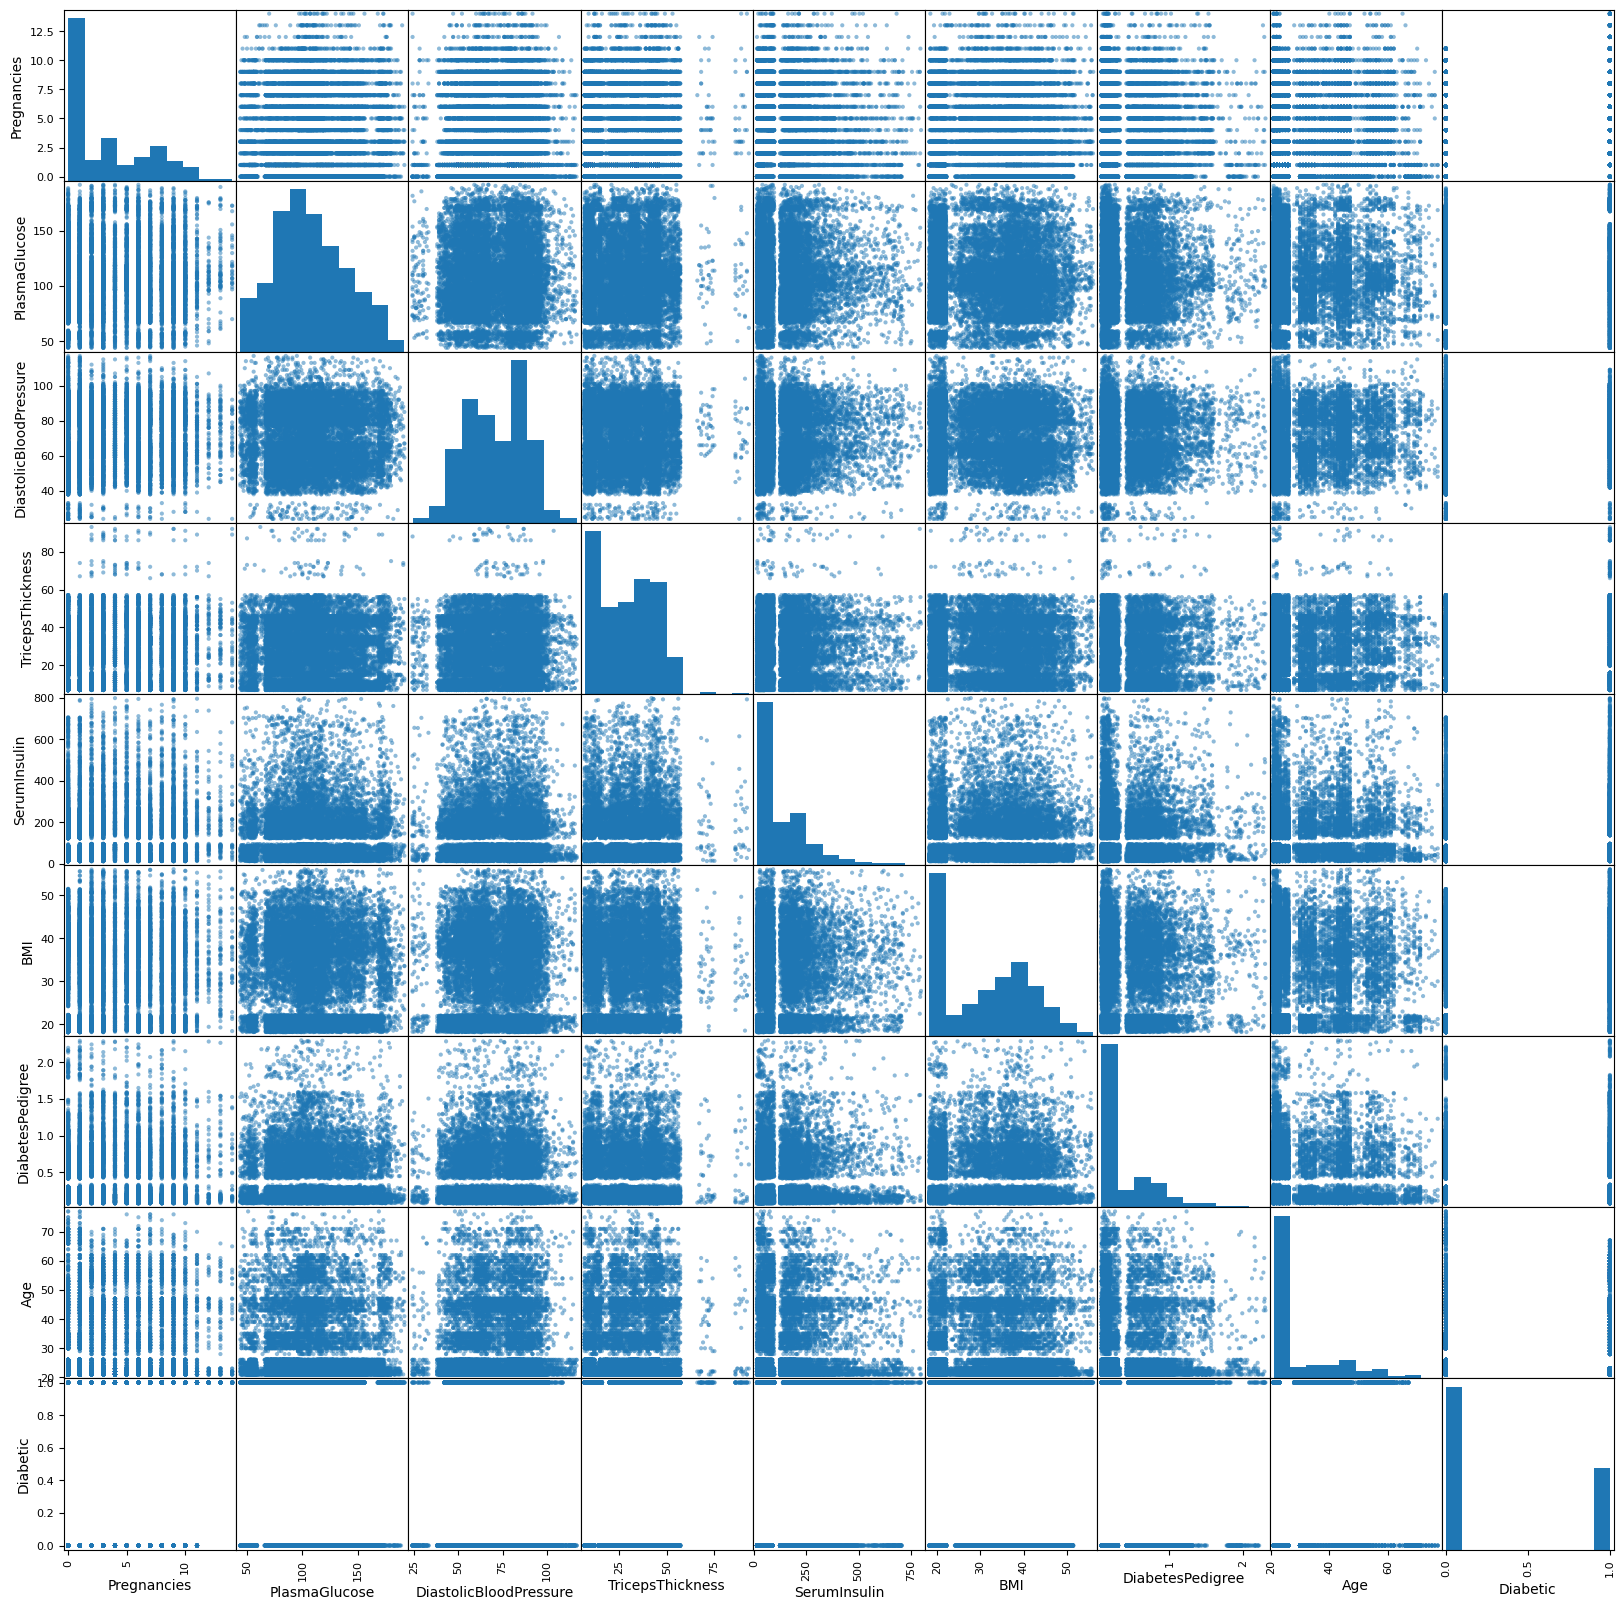

In [80]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

columns_to_plot = [col for col in dataset.columns if col != 'PatientID']

scatter_matrix(dataset[columns_to_plot], figsize=(20, 20))
plt.show()

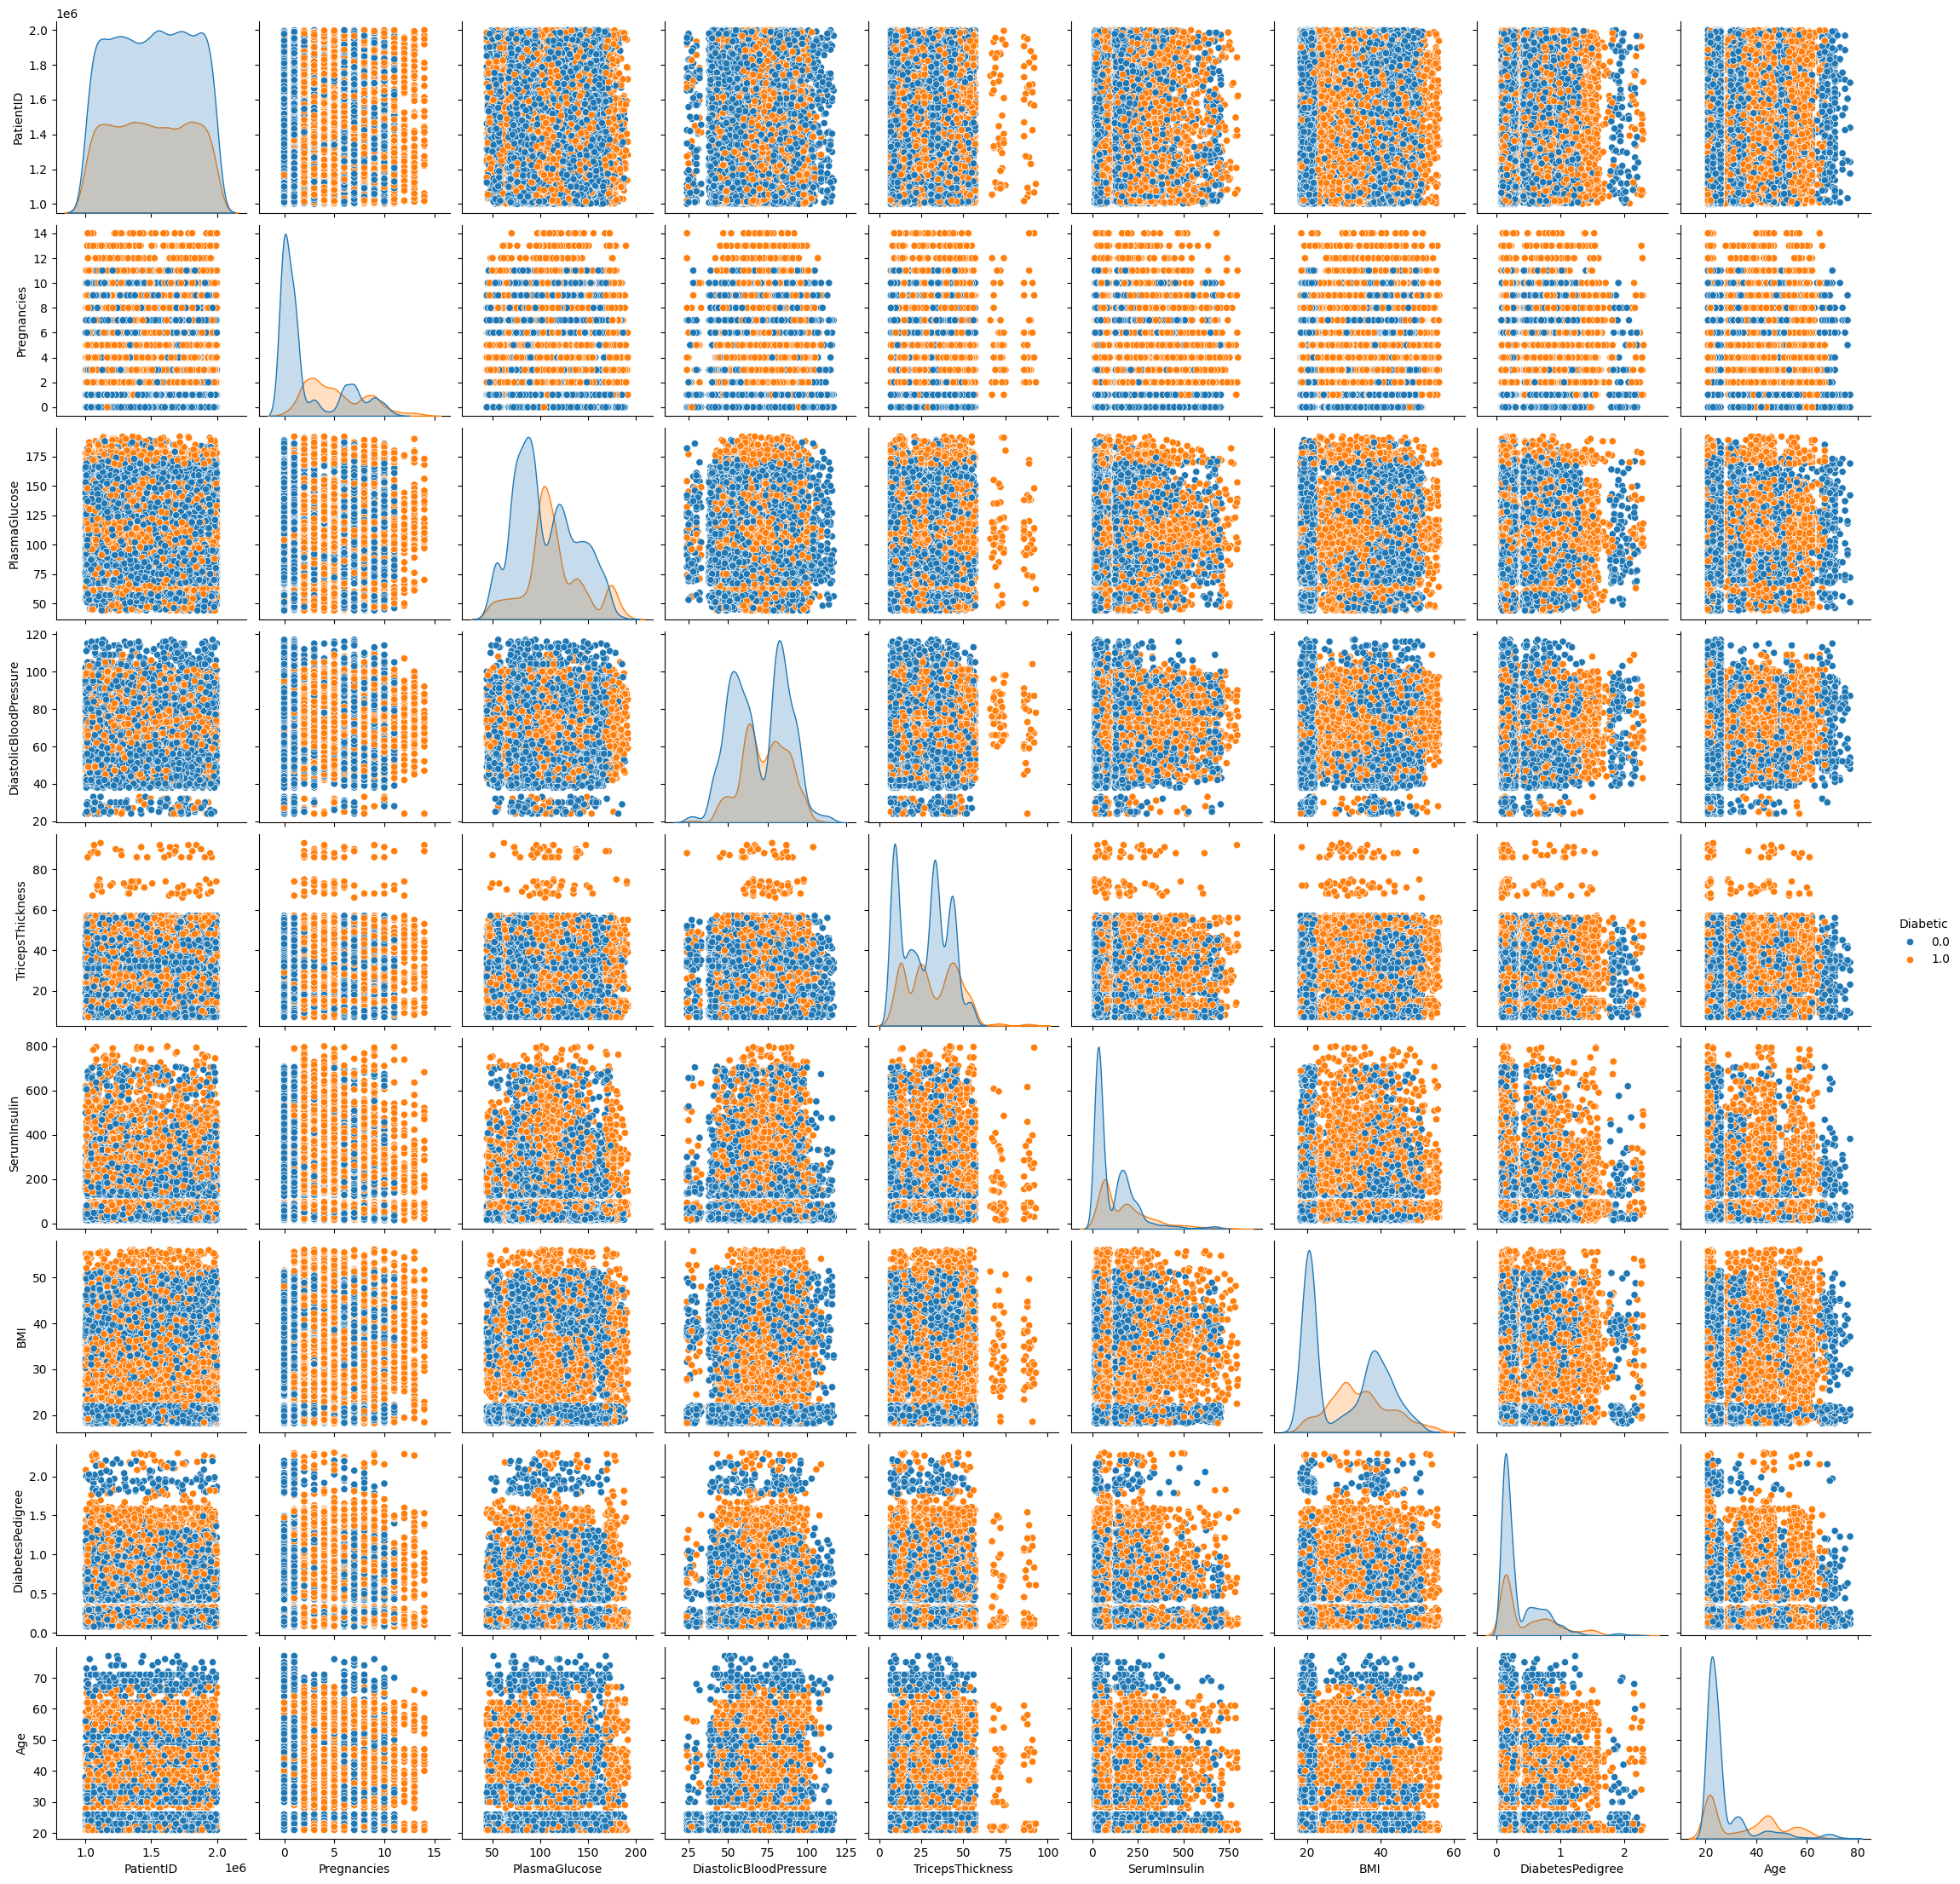

In [82]:
sns.pairplot(data = dataset, hue = 'Diabetic')
plt.show()

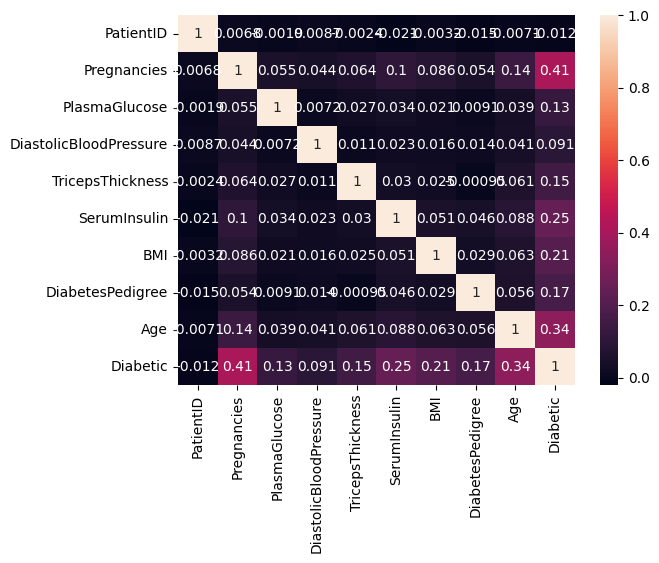

In [83]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

In [84]:
dataset_new = dataset

In [90]:
dataset_new[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = \
    dataset_new[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

KeyError: "['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'] not in index"

In [87]:
# Count of NaN
dataset_new.isnull().sum()

PatientID                 15000
Pregnancies               15000
PlasmaGlucose             15000
DiastolicBloodPressure    15000
TricepsThickness          15000
SerumInsulin              15000
BMI                       15000
DiabetesPedigree          15000
Age                       15000
Diabetic                  15000
dtype: int64

In [89]:
dataset_new["Glucose"].fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new["BloodPressure"].fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

KeyError: 'Glucose'